### Import Modules

In [99]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Loading the image

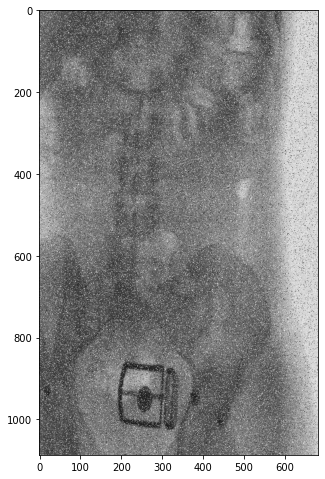

In [100]:
image = cv2.imread('Noisy_Spine.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 10))
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255);

### A: Median blur with 5x5 kernel

We use `cv2.medianBlur()` function to apply median blur on the image. The function takes two arguments, first one is our input image and second one is the kernel size. We use a 5x5 kernel here. The function returns the median blurred image.

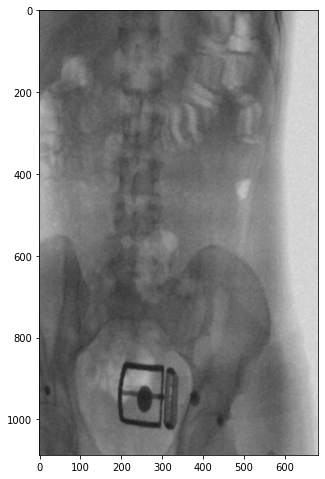

In [101]:
median_blur_image = cv2.medianBlur(image, 5)

plt.figure(figsize=(5, 10))
plt.imshow(median_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
cv2.imwrite('median_blur.png', median_blur_image);

As you can see in the saved image `median_blur.png` the salt and pepper noise is removed from the image and thus the image is much more clear.

### B: Average blur with 3x3 kernel

We use `cv2.blur()` function to apply average blur on the image. The function takes two arguments, first one is our input image and second one is the kernel size. We use a 3x3 kernel here. The function returns the average blurred image.

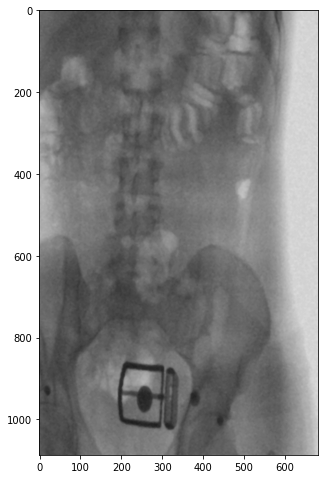

In [102]:
avg_blur_image = cv2.blur(median_blur_image, (3, 3))

plt.figure(figsize=(5, 10))
plt.imshow(avg_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
cv2.imwrite('avg_blur.png', avg_blur_image);

We can see from the output image `average_blur.png` that the image is more smooth than the median blur image.

### C: Performing laplacian kernel

In this section, we'll write a function to perform laplacian kernal on the image and return a new laplacian image:

In [103]:
def laplacian(img, pad = 1):
    '''
    Performs laplacian operation on image.
    :param img: The image
    :param pad: Padding berfore applting the laplacian (optional)
    :return: the laplacian values in the form of np.float64 numpy array
    '''
    kernel = np.array([
        [1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]
    ])
    padded_image = np.pad(img, pad, mode = 'edge')
    # perform the kernel
    lap_image = np.zeros(img.shape, dtype=np.float64)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            lap_image[i-1, j-1] = np.sum(np.multiply(neighborhood, kernel))
    return lap_image

now we define a function to map the pixels with value higher than 255 to 255 and pixels with value lower than 0 to 0:

In [104]:
def map(img):
    '''
    Maps the pixels with value higher than 255 to 255 and pixels with value lower than 0 to 0
    :param img: The input image
    :return: The mapped image as a np.uint8 numpy array
    '''
    new_image = img.copy()
    new_image[new_image > 255] = 255
    new_image[new_image < 0] = 0
    new_image = new_image.astype(np.uint8)
    return new_image

lets perform the laplacian kernel on the image and then sum a factor of laplacian image with the original image:

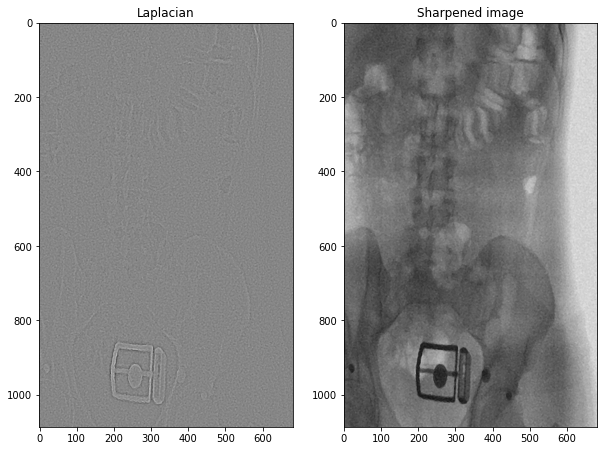

In [105]:
laplacian_image = laplacian(avg_blur_image)
c = -1
sharpened_image = map(avg_blur_image + c * laplacian_image)

fig, ax = plt.subplots(1, 2, figsize = (10, 8))

ax[0].imshow((laplacian_image - np.min(laplacian_image)) / (np.max(laplacian_image) - np.min(laplacian_image)), cmap='gray', vmin = 0, vmax = 1)
ax[0].set_title('Laplacian')

ax[1].imshow(sharpened_image, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Sharpened image')
cv2.imwrite('sharpened_image.png', sharpened_image);

We can see that the resulting image is sharper than the average blur image. I've used `c = 1` as the factor of laplacian.

### D: Plotting the results

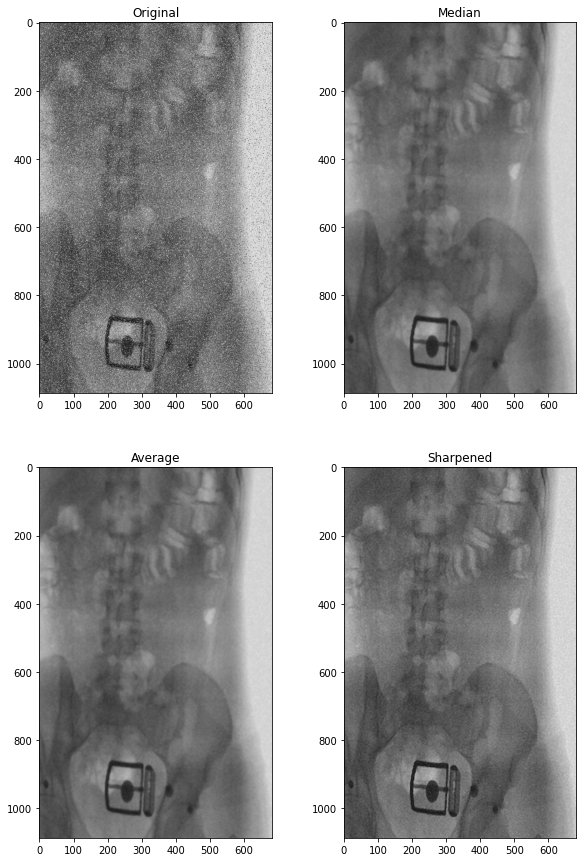

In [106]:
fig, ax = plt.subplots(2, 2, figsize = (10, 15))

ax[0,0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(median_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Median')

ax[1,0].imshow(avg_blur_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Average')

ax[1,1].imshow(sharpened_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,1].set_title('Sharpened')

plt.show();

### E: Another scenario: Average blur -> Median blur -> Laplacian

In this section, we'll perform the same steps as above but in a different order. We'll first perform average blur on the image, then median blur and then laplacian.

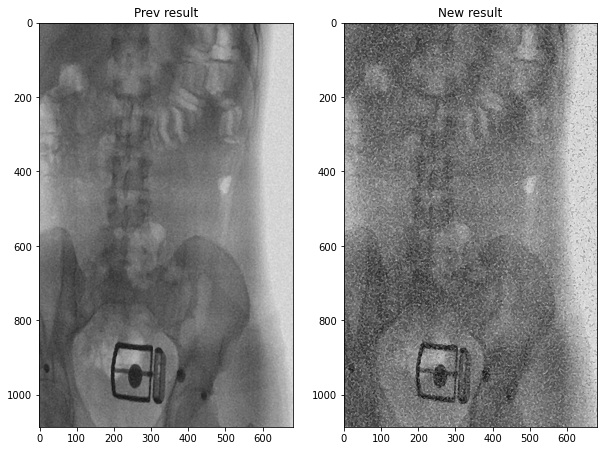

In [107]:
avg_blur_image2 = cv2.blur(image, (3, 3))
median_blur_image2 = cv2.medianBlur(avg_blur_image2, 5)
laplacian_image2 = laplacian(median_blur_image2)
c = -1
sharpened_image2 = map(median_blur_image2 + c * laplacian_image2)

fig, ax = plt.subplots(1, 2, figsize = (10, 8))

ax[0].imshow(sharpened_image, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Prev result')

ax[1].imshow(sharpened_image2, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('New result')

plt.show()


to understand why the image is not as sharp as the previous one, we can plot images in different stages:

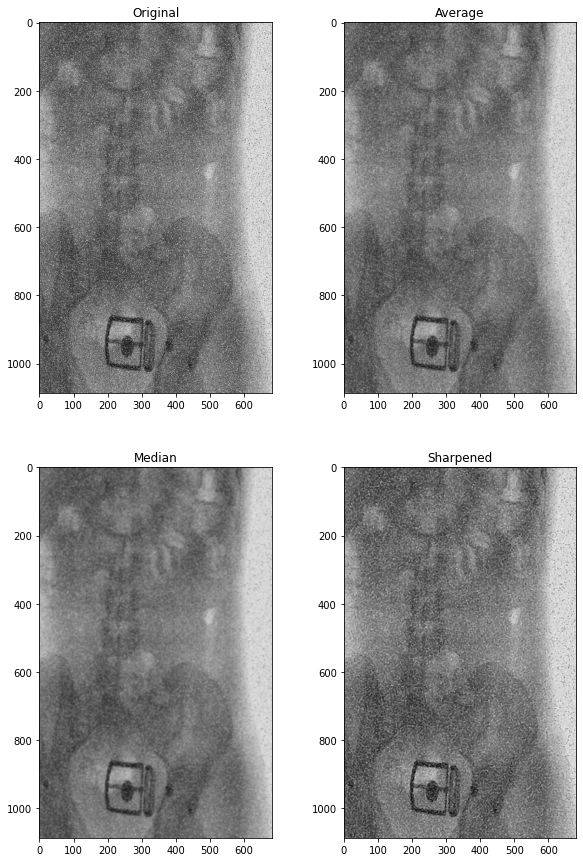

In [108]:
fig, ax = plt.subplots(2, 2, figsize = (10, 15))

ax[0,0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(avg_blur_image2, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Average')

ax[1,0].imshow(median_blur_image2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Median')

ax[1,1].imshow(sharpened_image2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,1].set_title('Sharpened')

plt.show();

As you can see, when we perform the average blur at first, the salt and pepper transitions in the image gets smoother and propagate inside the image. Thus, the median blur can not remove the noise as effectively as it did in the previous scenario and the resulting image is more noisy.